In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
data=pd.read_excel('EDA_Shark_Tank_India.xlsx')
data

,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
0,1,1,BluePine Industries,Frozen Momos,1,50.0,5.0,1000.00,75.0,16.00,...,1,0,1,0,1,0,0,3,25.0,5.333333
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,1,40.0,15.0,266.67,40.0,50.00,...,1,0,0,0,1,0,0,2,20.0,25.000000
2,1,3,Heart up my Sleeves,Detachable Sleeves,1,25.0,10.0,250.00,25.0,30.00,...,0,1,0,0,1,0,0,2,12.5,15.000000
3,2,4,Tagz Foods,Healthy Potato Chips,1,70.0,1.0,7000.00,70.0,2.75,...,1,0,0,0,0,0,0,1,70.0,2.750000
4,2,5,Head and Heart,Brain Development Course,0,50.0,5.0,1000.00,0.0,0.00,...,0,0,0,0,0,0,0,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,34,113,Green Protein,Plant-Based Protein,0,60.0,2.0,3000.00,0.0,0.00,...,0,0,0,0,0,0,0,0,0.0,0.000000
113,34,114,On2Cook,Fastest Cooking Device,0,100.0,1.0,10000.00,0.0,0.00,...,0,0,0,0,0,0,0,0,0.0,0.000000
114,35,115,Jain Shikanji,Lemonade,1,40.0,8.0,500.00,40.0,30.00,...,1,1,1,0,1,0,0,4,10.0,7.500000
115,35,116,Woloo,Washroom Finder,0,50.0,4.0,1250.00,0.0,0.00,...,0,0,0,0,0,0,0,0,0.0,0.000000


###### Q1. Find the number of episodes?

In [3]:
#returns the number of unique values for each column
episode= data["episode_number"].nunique()
print("Total no. of episodes are", episode)

Total no. of episodes are 35


In [4]:
#Or
episode= data["episode_number"].unique()
episode

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35], dtype=int64)

In [5]:
Total_Episode=max(episode)
Total_Episode

35

###### Q2. Max, min , mean of asked amount,asked equity, asked valuation? 

In [6]:
#Asked Amount
asked_amount = data["pitcher_ask_amount"]
print("Max,Min and Mean for asked amount:")

#1.Max asked amount
a=max(asked_amount)
print('max',":",a)

#2.Min asked amount
b=min(asked_amount)
print("min",":",b)

#3.Mean of asked amount
c=np.mean(asked_amount)
print("Mean",":",c)
print('\n')

#Asked Equity
print("Max,Min and Mean for asked equity:")
asked_equity=data["ask_equity"]

#1.Max asked equity
a=max(asked_equity)
print('max',":",a)

#2.Min asked equity
b=min(asked_equity)
print("min",":",b)

#3. Mean of asked equity
c=np.mean(asked_equity)
print("Mean",":",c)
print('\n')

#Asked Valuation
print("Max,Min and Mean for Asked Valuation:")
asked_valuation=data["ask_valuation"]

#1.Max asked valuation
a=max(asked_valuation)
print('max',":",a)

#2.Min asked valuation
b=min(asked_valuation)
print("min",":",b)

#3.Mean for asked valuation
c=np.mean(asked_valuation)
print("Mean",":",c)

Max,Min and Mean for asked amount:
max : 30000.0
min : 0.00101
Mean : 319.8547094871795


Max,Min and Mean for asked equity:
max : 25.0
min : 0.25
Mean : 5.188034188034188


Max,Min and Mean for Asked Valuation:
max : 120000.0
min : 0.01
Mean : 3852.4624786324785


In [7]:
#Or
ab=data[["pitcher_ask_amount","ask_equity","ask_valuation"]].agg([max,min,"mean"]).style
ab.background_gradient(cmap='PuRd')

,pitcher_ask_amount,ask_equity,ask_valuation
max,30000.000000,25.000000,120000.000000
min,0.001010,0.250000,0.010000
mean,319.854709,5.188034,3852.462479


###### Q3. Max & Min asked- equity,asked-valuation and asked amount episode-wise? 

In [8]:
# Episode wise max value
Episodewise_Max=data.groupby('episode_number')[['pitcher_ask_amount','ask_equity','ask_valuation']].agg([max,min]).style
Episodewise_Max.background_gradient(cmap='BuPu')

###### Q4. Brand names in which 2 ,3 or 4 sharks are invested? 

In [9]:
Brand_names=data.loc[(data['total_sharks_invested']>1) & (data['total_sharks_invested']<5),['brand_name','total_sharks_invested']].style
Brand_names.background_gradient(cmap='binary')

,brand_name,total_sharks_invested
0,BluePine Industries,3
1,Booz scooters,2
2,Heart up my Sleeves,2
9,Cosiq,2
11,Bummer,2
12,Revamp Moto,2
18,Raising Superstars,2
21,Beyond Snack,2
22,Vivalyf Innovations- Easy Life,2
24,Altor,2


###### Q5. Episode wise minimum and maximum of sharks invested? 

In [10]:
max_shark=data.groupby('episode_number')['total_sharks_invested'].agg([max,min]).style
max_shark.background_gradient(cmap='Blues')

,max,min
episode_number,,
1,3,2
2,1,0
3,1,0
4,2,0
5,2,0
6,5,0
7,2,0
8,2,1
9,2,0


<Axes: xlabel='episode_number'>

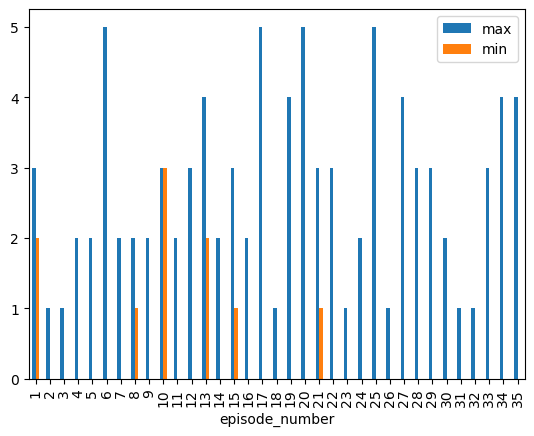

In [11]:
max_shark=data.groupby('episode_number')['total_sharks_invested'].agg([max,min]).plot.bar()
max_shark

###### Q6. Minimum and Maximum sharks invested in each brand? 

In [12]:
pd.options.display.max_rows = None
max_or_min= data.groupby('brand_name')['total_sharks_invested'].agg([max,min]).style

max_or_min.background_gradient(cmap='Purples')
max_or_min



,max,min
brand_name,,
ARRCOAT Surface Textures,1,1
Aas Vidyalaya,3,3
Agro tourism,0,0
Aliste Technologies,0,0
Alpino,0,0
Altor,2,2
Annie,3,3
Anthyesti,0,0
Ariro,2,2


###### Q7. Brand names who ask for 1 crore and got a deal? 

In [13]:
data[(data["pitcher_ask_amount"] == 100) & (data["deal"] == 1)][["brand_name","pitcher_ask_amount","deal_amount"]].style

,brand_name,pitcher_ask_amount,deal_amount
12,Revamp Moto,100.000000,100.000000
39,The Renal Project,100.000000,100.000000
55,Otua,100.000000,1.000000
64,Get a Whey,100.000000,100.000000
71,Namhya Foods,100.000000,50.000000
79,Sunfox Technologies,100.000000,100.000000
87,Insurance Samadhan,100.000000,100.000000


<Axes: xlabel='brand_name'>

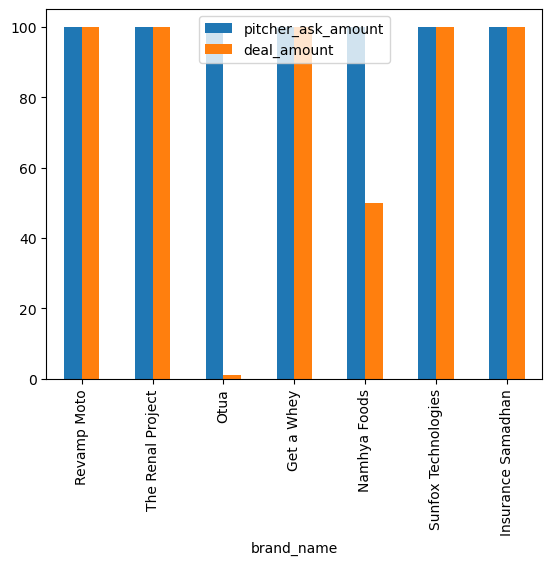

In [14]:
data[(data["pitcher_ask_amount"] == 100) & (data["deal"] == 1)][["brand_name","pitcher_ask_amount","deal_amount"]].set_index("brand_name").plot.bar()

###### Q8. Brand names where deal equity is between 0 to 50? 

In [15]:
Deal_Equity=data[(data["deal_equity"]  >= 0) & (data["deal_equity"] <=50)][["brand_name", "ask_equity","deal_equity"]].style

In [16]:
Deal_Equity.background_gradient(cmap='gist_heat')

,brand_name,ask_equity,deal_equity
0,BluePine Industries,5.000000,16.000000
1,Booz scooters,15.000000,50.000000
2,Heart up my Sleeves,10.000000,30.000000
3,Tagz Foods,1.000000,2.750000
4,Head and Heart,5.000000,0.000000
5,Agro tourism,5.000000,0.000000
6,Qzense Labs,0.250000,0.000000
7,Peeschute,4.000000,6.000000
8,NOCD,2.000000,15.000000
9,Cosiq,7.500000,25.000000


###### Q9. Find the number of brands participated in each episode? 

In [17]:
shark=data.groupby('episode_number')['brand_name'].count()
shark

episode_number
1     3
2     3
3     3
4     3
5     3
6     3
7     3
8     3
9     3
10    3
11    3
12    3
13    3
14    3
15    3
16    4
17    4
18    4
19    4
20    3
21    3
22    4
23    4
24    3
25    3
26    3
27    4
28    3
29    3
30    4
31    4
32    4
33    4
34    4
35    3
Name: brand_name, dtype: int64

<Axes: xlabel='episode_number', ylabel='brand_no.'>

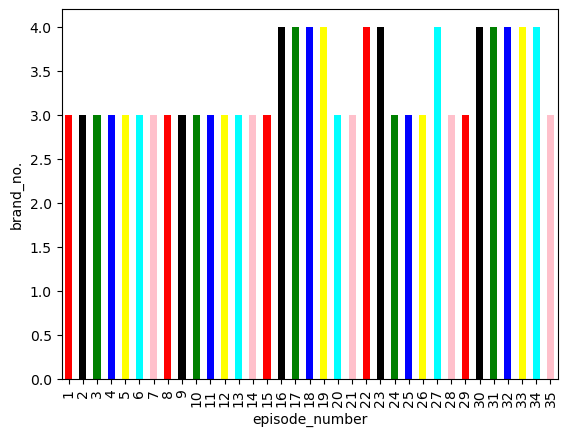

In [18]:
shark=data.groupby('episode_number')['brand_name'].count().plot.bar(ylabel='brand_no.',color=['red', 'black', 'green', 'blue', 'yellow', 'cyan','pink','red', 'black', 'green', 'blue', 'yellow', 'cyan','pink','red', 'black', 'green', 'blue', 'yellow', 'cyan','pink','red', 'black', 'green', 'blue', 'yellow', 'cyan','pink','red', 'black', 'green', 'blue', 'yellow', 'cyan','pink','red', 'black', 'green', 'blue', 'yellow', 'cyan','pink','red', 'black', 'green', 'blue', 'yellow', 'cyan','pink'])
shark

######  Q10. How many sharks participated in this show and What were their names? 

In [19]:
print("Total number of sharks:",len(data.columns[11:18]))
shark_present=data.columns[11:18]
print("""Names of the Sharks are: ashneer, anupam, aman, namita,vineeta, peyush, ghazal""")

Total number of sharks: 7
Names of the Sharks are: ashneer, anupam, aman, namita,vineeta, peyush, ghazal


###### Q11. Find appearance of each sharks? 

In [20]:
ab=data[["ashneer_present","anupam_present","aman_present","namita_present","vineeta_present","peyush_present","ghazal_present"]]
Present=ab.sum().sort_values()
Present

ghazal_present      26
vineeta_present     66
peyush_present      88
ashneer_present     98
aman_present        98
namita_present     106
anupam_present     117
dtype: int64

Text(0.5, 1.0, 'Appearance of each sharks')

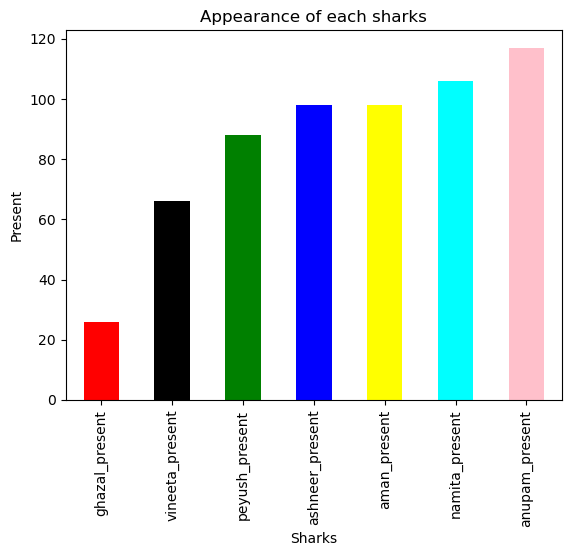

In [21]:
Present.plot.bar(color=['red', 'black', 'green', 'blue', 'yellow', 'cyan','pink'])
plt.xlabel("Sharks")
plt.ylabel("Present")
plt.title("Appearance of each sharks")

###### Q12. How many entrepreneurs were present? 

In [22]:
data["pitch_number"].nunique()

117

###### Q13. How many times each shark invested the deal?

<Axes: title={'center': 'Shark invested'}>

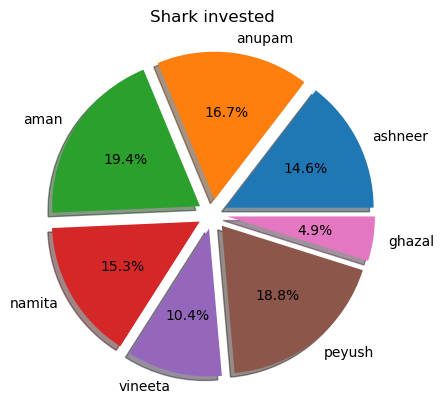

In [23]:
abc=data[["ashneer_deal","anupam_deal","aman_deal","namita_deal","vineeta_deal","peyush_deal","ghazal_deal"]]
labels="ashneer","anupam","aman","namita","vineeta","peyush","ghazal"
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1)
abc.sum().plot(kind= 'pie', title='Shark invested',explode=explode,shadow=True,autopct='%1.1f%%',labels=labels)

###### Q14. Find the equity percent that each sharks gets? 

In [24]:
l = []
for i in data.columns[18:25]:
    x=data[data[i]==1]
    s=x["equity_per_shark"].sum()
    l.append(s)
    print(i,"total equity",s) 

ashneer_deal total equity 93.249999999
anupam_deal total equity 166.35
aman_deal total equity 160.263333334
namita_deal total equity 134.78333333400002
vineeta_deal total equity 131.533333333
peyush_deal total equity 315.84999999999997
ghazal_deal total equity 46.7


Max Equity percent get by Peyush

In [25]:
for i in data.columns[18:25]:
    x=data[data[i]==1]
    s=x["equity_per_shark"].sum()
    
    print(i,"Equity percent:",s*100/sum(l))

ashneer_deal Equity percent: 8.891707112316801
anupam_deal Equity percent: 15.862042661123454
aman_deal Equity percent: 15.281658132598478
namita_deal Equity percent: 12.852052800434812
vineeta_deal Equity percent: 12.542154161032869
peyush_deal Equity percent: 30.117380069226584
ghazal_deal Equity percent: 4.453005063266999


###### Q15. Find the total number of amount invested in this show?

In [26]:
x = data[data["deal"]==1]
x['deal_amount'].sum()

3642.00106